# Decision Tree - Prunning

## Post prunning
* Method to prune the tree or cut the branches of large tree(decreasing the depth).
* Helps to overcome the **Overfitting** Condition.

## Post Prunning - Techniques
* **Cost-Complexity-Prunning** is a post-prunning technique parametrized by **ccp_alpha**.
* Increase **ccp_alpha** value $--->$ Increase the number of nodes pruned.
* Finally we are going to **choose ccp_alpha** value by **cross-validation scores**.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# 1. Modelling, Checking Accuracy (Without Prunning)

### Loading the breast cancer data 
* We can access it from **sklearn.datasets**
* It's a classification of breast cancer of class benign and malignant

In [21]:
# Loading the breast cancer data into X and y
X,y = load_breast_cancer(return_X_y = True)

### Splitting the dataset

In [24]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Modelling of Decision Tree

In [25]:
# Initiate the Decision tree Classifier
model = DecisionTreeClassifier(random_state = 0) # By default using gini criteria
# Fitting the model by training dataset
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Predicting the train dataset
pred_train = model.predict(X_train)

In [29]:
# Predicting the test dataset
prediction = model.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

### Checking the accuracy Score

In [30]:
# Import the library
from sklearn.metrics import accuracy_score

In [35]:
# Checking accuracy of train dataset
accuracy_score(pred_train, y_train)

1.0

In [33]:
# Checking the testing accuracy score
accuracy_score(y_test, prediction)

0.8811188811188811

In [36]:
# Comparison between train and test accuracy
print("Traning accuracy score:{0:0.4f}".format(accuracy_score(pred_train, y_train)))
print("Testing accuracy score:{0:0.4f}".format(accuracy_score(y_test, prediction)))

Traning accuracy score:1.0000
Testing accuracy score:0.8811


**Conclusion:**
* In Decision tree the accuracy of training data set is always 100%.
* Our model predict almost 88.11% of test data correctly.
* This always result the case of Overfitting in a Decission tree model.

### Diagram : Decision Tree

In [37]:
# Import the library
from sklearn import tree

[Text(780.5357142857143, 770.1, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(498.2142857142857, 679.5, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(332.14285714285717, 588.9, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(199.28571428571428, 498.3, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(132.85714285714286, 407.7, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(66.42857142857143, 317.1, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(199.28571428571428, 317.1, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(132.85714285714286, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(265.7142857142857, 226.5, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(199.28571428571428, 135.89999999999998, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(132.85714285714286, 45.30000000000007, 'gin

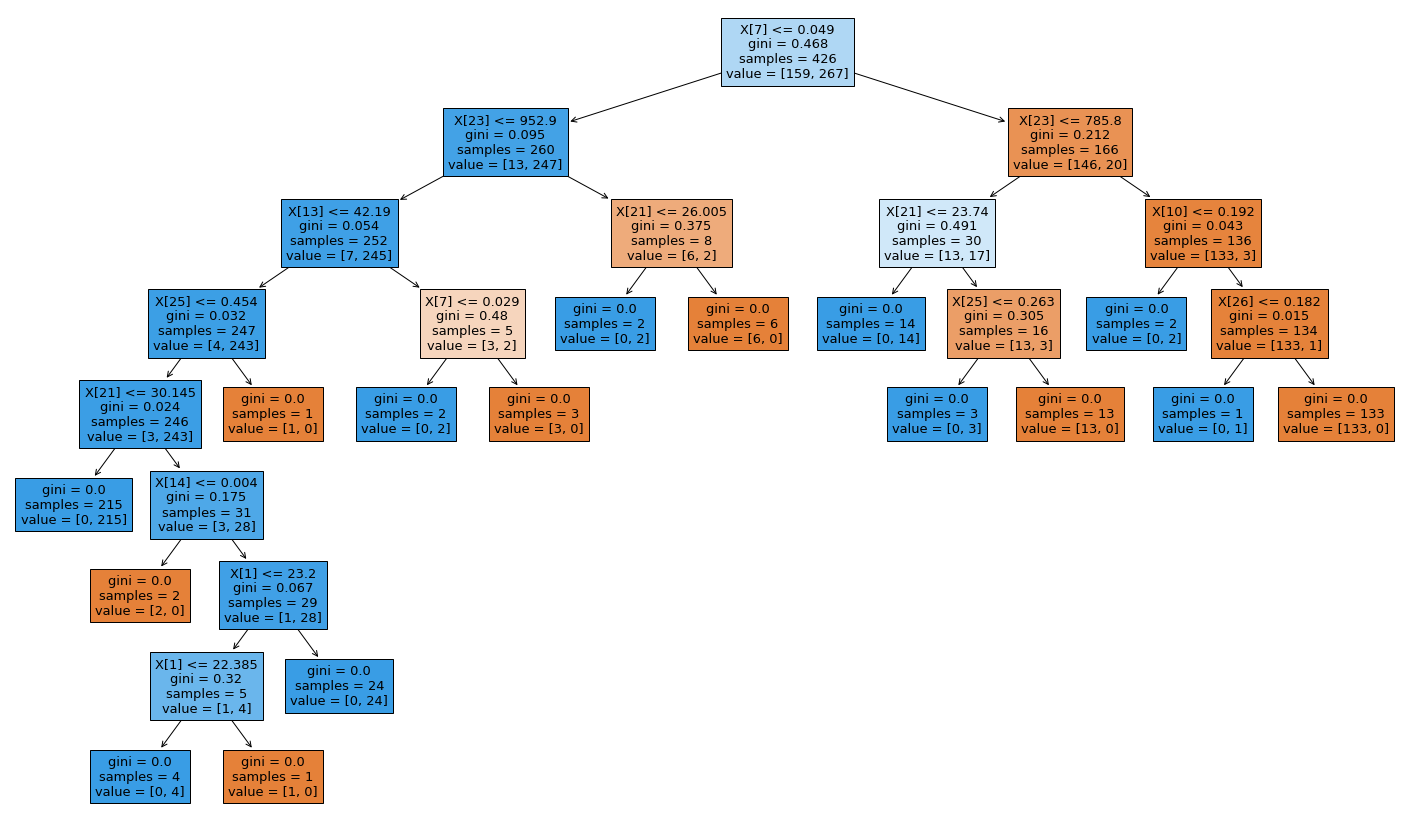

In [46]:
# Draw the tree diagram
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled = True)

# 2. Implementing Cost-Complexity Prunning

### What is Minimal Cost Complexity Prunning?
* Minimal ccp recursively find the node with weakest link.
* Weakest link is characterized by effective ccp_alpha.
* Nodes with smallest effective ccp_alpha are prunned first.
* For finding values of ccp_alpha we have **DecisionTreeClassifier.cost_complexity_pruning_path(X_train,y_train)** 
* It returns **effective alphas** and corresponding **Total Leaf Impurities**

### Finding Sequence of ccp_alpha:

In [48]:
# Implementing cost complexity prunning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [53]:
# Sequence of ccp_alpha
print(ccp_alphas)
# Sequence of total leaf impurities corresponding to ccp_alpha
print(impurities)

[0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
[0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


<font size = 3 color = blue> **Let's the graph of Total impurity vs effective alpha and Let's Visualize it:** <font>

fig, ax = plt.subplots()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

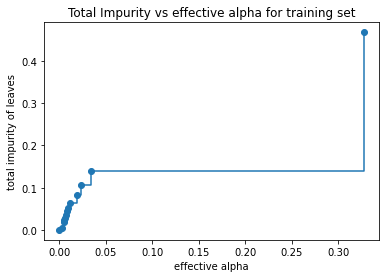

In [84]:
# Include tree with maximum effective alpha(only one leaf)
fig, ax = plt.subplots()
ax.plot(ccp_alphas,impurities, marker = 'o',drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

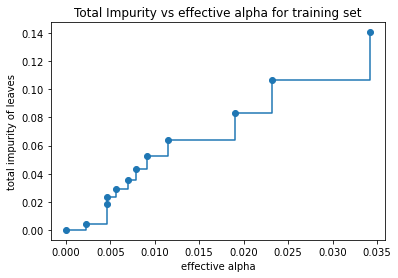

In [86]:
# Exclude tree with maximum effective alpha(only one leaf)
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

***Conclusion:***
* So we got the sequence of alphas which prune our trees.
* In above diagram we can see increase in ccp_alpha cause increase in impurities which is quite understandable. 
* Now Let's train our Decision tree using the effective $\alpha$ .
* The last value of ccp_alpha is a case of full prunning of tree.

### Fitting Decision tree for different alpha:

In [70]:
# Train Multiple Decision tree for different alphas
classifiers = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 0, ccp_alpha = alpha)
    model.fit(X_train, y_train)
    classifiers.append(model) 

In [71]:
# Different Decision tree classifier
classifiers

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

### Comparing Nodes and Depth with alpha

In [87]:
# Removing the only one node case
classifiers = classifiers[:-1]
ccp_alphas = ccp_alphas[:-1]

In [90]:
# Node and Depth Count of Decision trees
node_counts = [model.tree_.node_count for model in classifiers]
depth = [model.tree_.max_depth for model in classifiers]
print("Node counts:{}".format(node_counts))
print("Maximum Depth:{}".format(depth))

Node counts:[31, 27, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3]
Maximum Depth:[8, 6, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1]


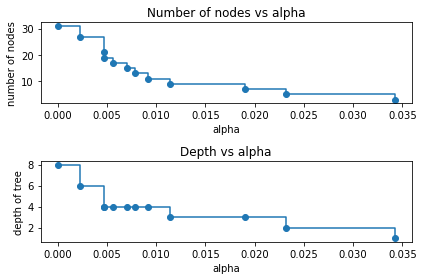

In [99]:
# Diagram of Nodes vs alpha & Depth vs alpha
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy.<br>
Now Let's Check the accuracy for different values of alpha.

In [100]:
train_acc_scores = [model.score(X_train,y_train) for model in classifiers]
test_acc_scores = [model.score(X_test, y_test) for model in classifiers]

In [114]:
for i in range(len(classifiers)):
    print("Decisiontree{}: Training - {} , Testing - {} ".format(i,train_acc_scores[i],test_acc_scores[i]))

Decisiontree0: Training - 1.0 , Testing - 0.8811188811188811 
Decisiontree1: Training - 0.9976525821596244 , Testing - 0.8881118881118881 
Decisiontree2: Training - 0.9906103286384976 , Testing - 0.916083916083916 
Decisiontree3: Training - 0.9882629107981221 , Testing - 0.916083916083916 
Decisiontree4: Training - 0.9835680751173709 , Testing - 0.916083916083916 
Decisiontree5: Training - 0.9788732394366197 , Testing - 0.9230769230769231 
Decisiontree6: Training - 0.9765258215962441 , Testing - 0.9300699300699301 
Decisiontree7: Training - 0.971830985915493 , Testing - 0.9300699300699301 
Decisiontree8: Training - 0.9647887323943662 , Testing - 0.9370629370629371 
Decisiontree9: Training - 0.9553990610328639 , Testing - 0.916083916083916 
Decisiontree10: Training - 0.931924882629108 , Testing - 0.916083916083916 
Decisiontree11: Training - 0.9225352112676056 , Testing - 0.8811188811188811 


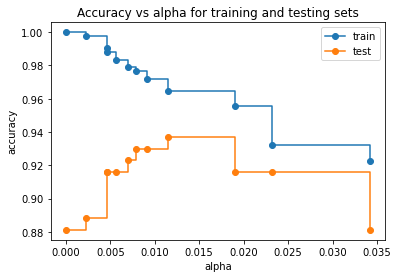

In [117]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_acc_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Conclusions:
* From the diagram we conclude that:<br>
* To maximize the accuracy we should take alpha between 0.12 to 0.19.<br>
* In Particular take **ccp_alpha 0.15**.<br>
* Hence our Final Decision tree model is :<br>
  - <font color = blue>*DecisionTreeclassifier(random_state = 0, ccp_alpha = 0.15)*<font>

In [131]:
# Final Model
final_model = DecisionTreeClassifier(random_state = 0 , ccp_alpha = 0.012)
final_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [132]:
print("Training Accuracy:{}".format(final_model.score(X_train, y_train)))
print("testing Accuracy:{}".format(final_model.score(X_test, y_test)))

Training Accuracy:0.9647887323943662
testing Accuracy:0.9370629370629371


[Text(697.5, 713.475, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(348.75, 509.625, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(174.375, 305.775, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(523.125, 305.775, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(1046.25, 509.625, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(871.875, 305.775, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(697.5, 101.92499999999995, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(1046.25, 101.92499999999995, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(1220.625, 305.775, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

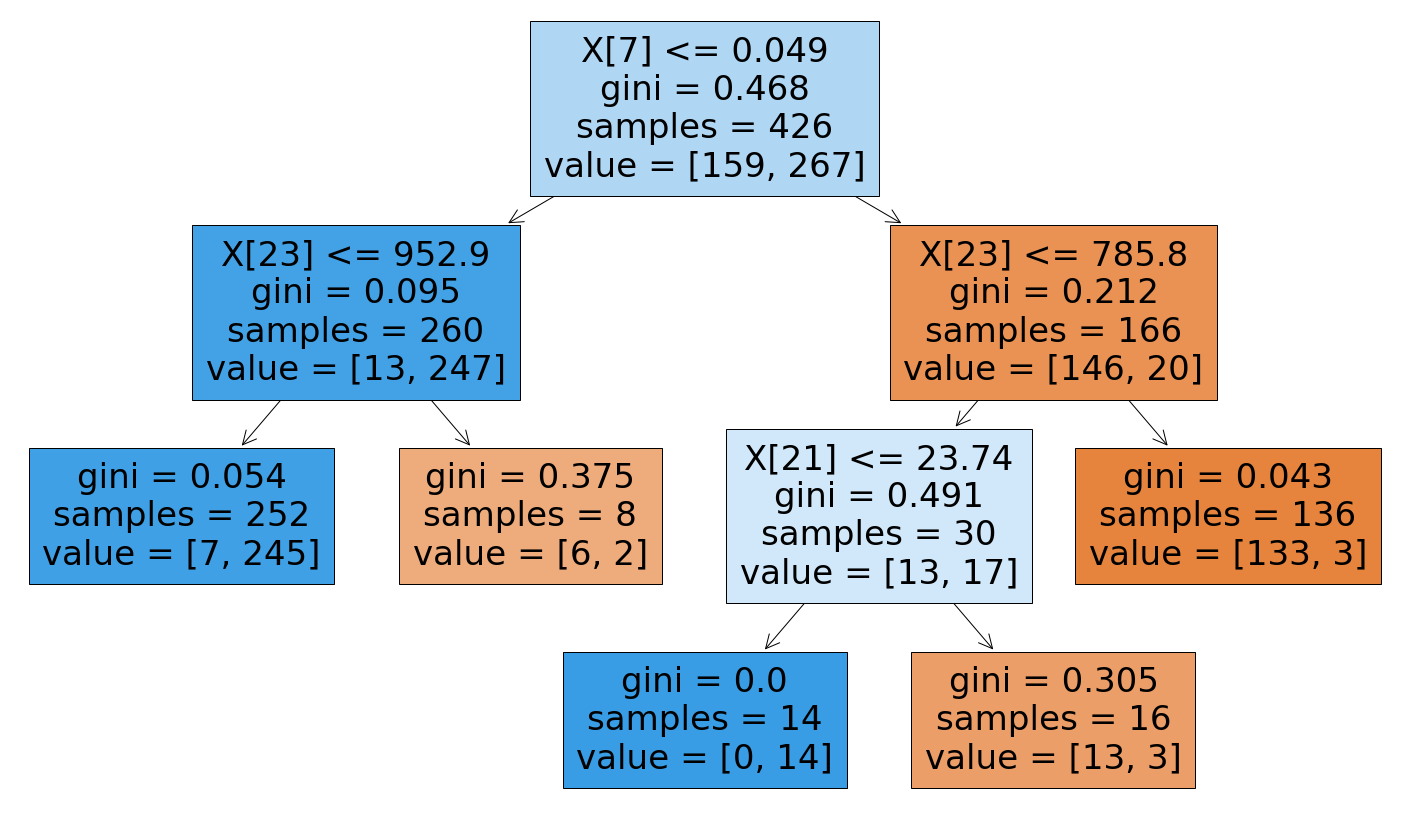

In [133]:
# Draw the final model tree diagram
plt.figure(figsize=(25,15))
tree.plot_tree(final_model,filled = True)